In [1]:
topic_tweet_count_path = r'C:\Users\Eli Wolfson\Documents\University\Research\FakeNews\additional_code\70_PERCENT_CONFIDENCE_53K_INDIVIDUAL_HCP_AUTHORS_2020_NO_KEYWORDS_WITH_RETWEETS_20_TOPICS\tweet_topic_count_per_week.csv'

In [2]:
import pandas as pd

df = pd.read_csv(topic_tweet_count_path)

df = df.rename({'Unnamed: 0': 'date'}, axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [3]:
topics_to_show = [0, 1, 2, 3, 6, 8, 9, 10, 16]

In [15]:
topic_names = {
    0: 'Public Health and Social Values',
    1: 'Day-to-Day Life',
    2: 'Food',
    3: 'Politics',
    6: 'Professional Achievements',
    8: 'Medical Studies and COVID-19 Information',
    9: 'Loss and Consolation',
    10: 'Account Promotion',
    16: 'Picture Challenges',
    
    -1: 'Others'
}

topic_colors = {
    0: '#40e0d0',
    1: '#00ffff',
    2: '#ff4500',
    3: '#ff0000',
    6: '#7cfc00',
    8: '#ffa500',
    9: '#ffd700',
    10: '#00fa9a',
    16: '#228b22',
    
    -1: '#d1d5d9'
}

average_topic_sentiment = {
    0: 0.11843161854767005,
    1: 0.27355524656368474,
    2: 0.09705403002121062,
    3: 0.04247108479993359,
    6: 0.5636979945116226,
    8: 0.10301415066797329,
    9: 0.11295540352189283,
    10: 0.48003424271793793,
    16: 0.5004917300608777,
    
    -1: 1.0
}

topic_sentiment_bci = {
    0: (0.11761741173715531, 0.11924582535818479),
    1: (0.27284897317797485, 0.2742615199493946),
    2: (0.09597171644532085, 0.09813634359710038),
    3: (0.040954408548284776, 0.043987761051582405),
    6: (0.5627912000894756, 0.5646047889337696),
    8: (0.10166706707548102, 0.10436123426046555),
    9: (0.10892935566102738, 0.11698145138275828),
    10: (0.4774333656106672, 0.4826351198252087),
    16: (0.49806285492992663, 0.5029206051918287)
}

In [16]:
def normalize(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

## Lines

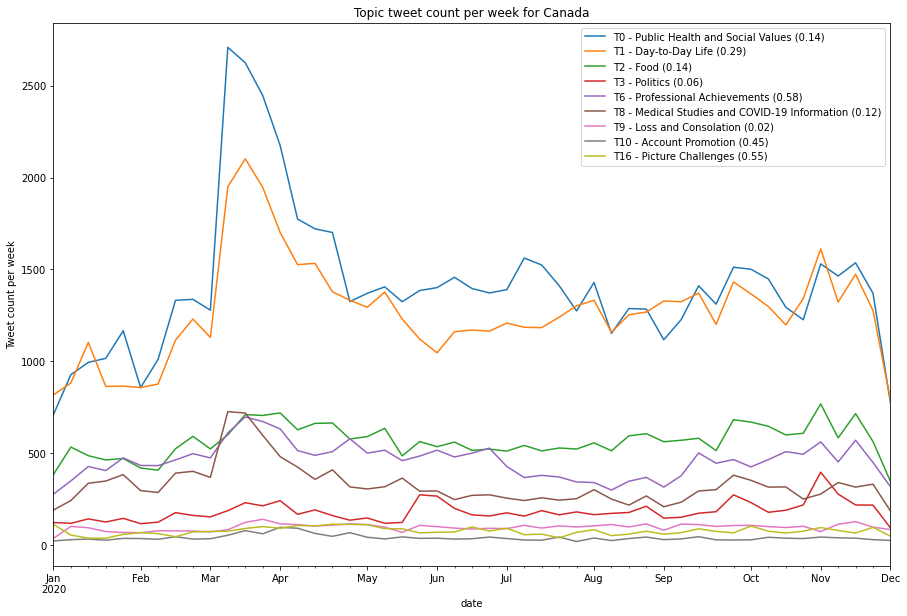

In [46]:
import matplotlib.pyplot as plt

specific_topics_df = df[['t{}'.format(i) for i in topics_to_show]]

specific_topics_df.plot(figsize=(15, 10))
plt.title('Topic tweet count per week for Canada')
plt.ylabel('Tweet count per week')
plt.legend(['T{} - {} ({:.2f})'.format(i, topic_names[i], average_topic_sentiment[i]) for i in topics_to_show])
plt.show()

## Single topic, multiple countries

In [49]:
topic_tweet_count_path = r'C:\Users\Eli Wolfson\Documents\University\Research\FakeNews\additional_code\70_PERCENT_CONFIDENCE_53K_INDIVIDUAL_HCP_AUTHORS_2020_NO_KEYWORDS_WITH_RETWEETS_20_TOPICS\tweet_topic_count_per_week_{}.csv'
df_us_path = topic_tweet_count_path.format('United_States')
df_uk_path = topic_tweet_count_path.format('United_Kingdom')
df_canada_path = topic_tweet_count_path.format('Canada')

df_us = pd.read_csv(df_us_path)
df_us = df_us.rename({'Unnamed: 0': 'date'}, axis=1)
df_us['date'] = pd.to_datetime(df_us['date'])
df_us = df_us.set_index('date')

df_uk = pd.read_csv(df_uk_path)
df_uk = df_uk.rename({'Unnamed: 0': 'date'}, axis=1)
df_uk['date'] = pd.to_datetime(df_uk['date'])
df_uk = df_uk.set_index('date')

df_canada = pd.read_csv(df_canada_path)
df_canada = df_canada.rename({'Unnamed: 0': 'date'}, axis=1)
df_canada['date'] = pd.to_datetime(df_canada['date'])
df_canada = df_canada.set_index('date')

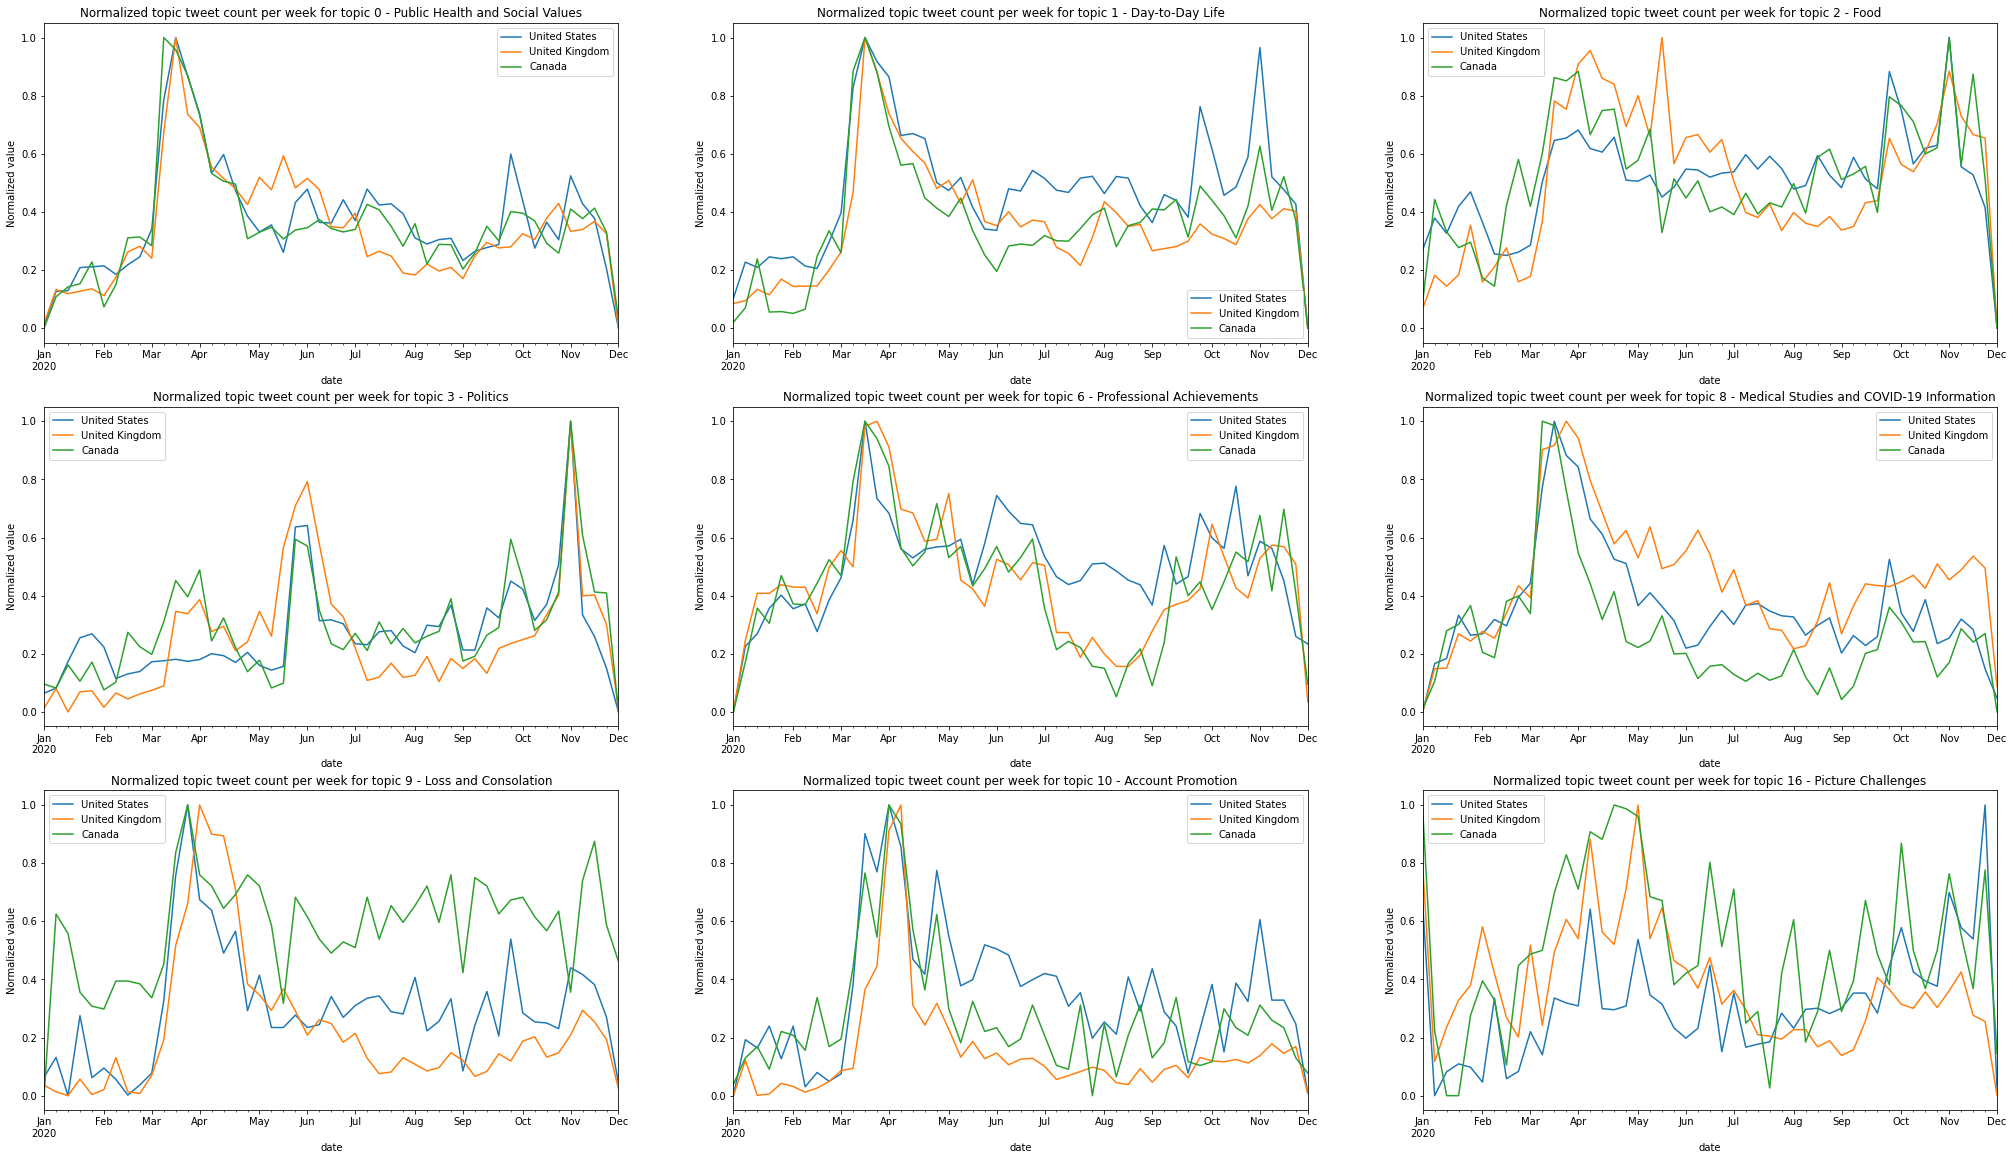

In [89]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 20))

for i, topic_to_show in enumerate(topics_to_show): 
    normalize(df_us['t{}'.format(topic_to_show)]).plot(ax=axes[i // 3, i % 3])
    normalize(df_uk['t{}'.format(topic_to_show)]).plot(ax=axes[i // 3, i % 3])
    normalize(df_canada['t{}'.format(topic_to_show)]).plot(ax=axes[i // 3, i % 3])

    axes[i // 3, i % 3].set_title('Normalized topic tweet count per week for topic {} - {}'.format(topic_to_show, topic_names[topic_to_show]))
    axes[i // 3, i % 3].set_ylabel('Normalized value')
    axes[i // 3, i % 3].legend(['United States', 'United Kingdom', 'Canada'])
    
plt.show()

## Volumes

In [17]:
# NORMALIZE LAST TIME PERIOD

num_days_missing = 3
time_period = 7

df.loc['2020-12-02'] = df.loc['2020-12-02'] / ((time_period - num_days_missing) / time_period)

In [18]:
# Create 'Others' topic

other_topic_list = list(set(list(range(20))) - set(topics_to_show))
df['t-1'] = df[[f't{topic_num}' for topic_num in other_topic_list]].sum(axis=1)

In [19]:
sorted_topics_descending = [topic for (topic, _) in sorted(list(average_topic_sentiment.items()), key=lambda tup: tup[1], reverse=True)]

In [20]:
#import colorsys
#import numpy as np

# colorsys - hue of red = 0, hue of green = 1/3
# reduce [-1.0, 1.0] to this range

#for topic, sentiment in average_topic_sentiment.items():
#    rgb = colorsys.hsv_to_rgb((sentiment + 0.3) / 3, 1.0, 1.0)
#    topic_colors[topic] = '#%02x%02x%02x' % tuple([int(round(255*x)) for x in rgb])

In [21]:
# we need to convert the df to json like this:
# [{"series": "t0", "count": <num_tweets_that_week>, "date": "2000-01-01T08:00:00.000Z"}]

df_json = []

for topic in reversed(sorted_topics_descending):
    series = f't{topic}: {topic_names[topic]}'
    for date in df[f't{topic}'].index:
        date_str = date.strftime('%Y-%m-%dT%H:%M:%S.000Z')
        count = int(df[f't{topic}'][date])
        df_json.append({'series': series, 'count': count, 'date': date_str, 'color': topic_colors[topic]})

In [22]:
import json

with open('topic_volume.json', 'w') as f:
    json.dump(df_json, f)

In [23]:
order_str = '{'
for i, topic in enumerate(reversed(sorted_topics_descending)):
    order_str += f"'{topic_names[topic]}': {i}, "
order_str = order_str[:-2] + '}'

In [24]:
import altair as alt

alt.Chart('topic_volume.json').transform_calculate(
    order=order_str + '[datum.variable]'
).mark_area().encode(
    alt.X('date:T',
        axis=alt.Axis(format='%Y-%m-%d', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(range=[topic_colors[topic] for topic in reversed(sorted_topics_descending)]),
        legend=None,
        sort=alt.SortField('order')
    ),
    order='order:O'
).properties(
    width=800,
    height=500
).configure(
    font='calibri'
).configure_axis(
    labelFontSize=14,
    titleFontSize=0,
    labelAngle=45
)

alt.Chart(...)

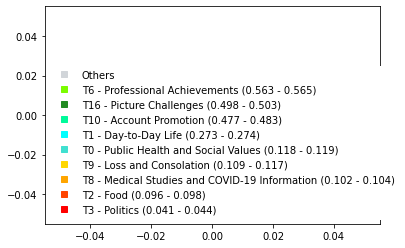

In [50]:
# legend

import matplotlib.pyplot as plt

colors = [topic_colors[topic] for topic in sorted_topics_descending]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(len(sorted_topics_descending))]
labels = [f'T{topic} - {topic_names[topic]} ({topic_sentiment_bci[topic][0]:.3f} - {topic_sentiment_bci[topic][1]:.3f})' if topic != -1 else 'Others' for topic in sorted_topics_descending]
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=True, fontsize='medium', edgecolor='white')

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()

## Not used

In [ ]:
from datetime import datetime

# relative volumes in certain time frames

num_frames = 3

dates = [datetime.strptime(d['date'], '%Y-%m-%dT%H:%M:%S.000Z') for d in df_json]
date_dividers = pd.date_range(min(dates), max(dates), num_frames + 1)

frame_topic_tweet_count = {i: {f't{j}': 0 for j in topics_to_show} for i in range(num_frames)}

for entry in df_json:   
    # which frame is this entry in?
    entry_date = datetime.strptime(entry['date'], '%Y-%m-%dT%H:%M:%S.000Z')
    entry_frame = None
    for i in range(len(date_dividers) - 1):
        if date_dividers[i] <= entry_date < date_dividers[i+1]:
            entry_frame = i
            break
    if entry_frame is None:
        entry_frame = num_frames - 1
    
    frame_topic_tweet_count[entry_frame][entry['series'][:entry['series'].index(':')]] += entry['count']
    
for frame, topic_counts in frame_topic_tweet_count.items():
    print(f'Frame {frame} - {date_dividers[frame]} to {date_dividers[frame+1]}')
    all_counts = sum(topic_counts.values())
    for topic in topic_counts:
        print(f'Percentage for topic {topic}: {topic_counts[topic] / all_counts * 100.0}%')